In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size="6" color="red"><b>ch01. NLTK자연어처리 패키지</b></font>
```
자연어처리 : 텍스트전처리, 단어의 빈도수 측정, 문서유사도 측정, 연관분석, 딥려닝, 워드임베딩, 텍스트분류, ...
```

# 1. NLTK 패키지
- 텍스트 전처리 : 토큰화(문장, 어절, 형태소 나누기), 정규표현식을 이용하여 불용어 처리, 어간추출
- 품사태깅: 단어별 품사를 식별

```
pip install nltk==3.7
```

In [1]:
import nltk

In [3]:
# 말뭉치 다운로드 받을 폴더 (밑의 폴더가 아니라면 인식이 되지 않을수 있다)
# C:/nltk_data, D:/nltk_data, E:/nltk_data
# C:/Users/내컴퓨터이름/nltk_data
# C:/Users/내컴퓨터이름/anaconda3/ntlk_data
# C:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# C:/Users/내컴퓨터이름/anaconda3/lib/ntlk_data
# C:/Users/내컴퓨터이름/APPDATA/Roaming/nltk_data

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# 오스틴 소설 엠마 내용
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:30])

[Emma by Jane Austen 1816]

VO


In [7]:
type(emma), len(emma)

(str, 887071)

In [6]:
#sent_tokenizer() : 문장 단위로 쪼갠 list를 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 :', len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 : 7456
'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'


In [10]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [7]:
# RegexpTokenizer 클래스 : 토큰화할 때 정규표현식
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\d+')
digits = ret.tokenize(emma)
print(digits)
ret1 = RegexpTokenizer('\w+')
words = ret1.tokenize(sent_tokens[0])
print(words)
ret1 = RegexpTokenizer('[a-z]+') # 해당정규표현식에 맞는 단어만 추출
words = ret1.tokenize(sent_tokens[0])
print(words)

['1816', '8', '23', '28', '28', '24', '7', '10', '000', '10', '000', '26']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']
['mma', 'by', 'ane', 'usten', 'mma', 'oodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미가 있는 가장 작은 단위) 분석
- 자연어 처리의 기본은 형태소 분석과 품사태깅 - 어간추출(Stemming), 품사태깅(PosTagging)

In [11]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간 추출1 : PosterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer
pst = PorterStemmer()
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [18]:
# 어간 추출2 : LanscasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [22]:
# 어간 추출3 : RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

# 3. 품사태깅

In [12]:
print('품사태깅할 내용 :', word_tokenize(sent_tokens[0]))

from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사태깅 결과 :', tagged_list)

품사태깅할 내용 : ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
품사태깅 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unit

In [31]:
# 명사만 추출 : NN, NNS, NNP, NNPS, PRP
nouns_list = []
for word, tag in tagged_list:
#     if (tag=='NN') | (tag=='NNS') | (tag='NNP') | (tag=='NNPS'):
#     if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
    if tag.find('NN') != -1:
        nouns_list.append(word)
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


In [33]:
nouns_list = [word for word, tag in tagged_list if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


## Quiz. emma 소설 안에서
1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오
2. "Emma" 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS, PRP)만 뽑아 등장하는 명사의 종류 갯수 출력하시오

In [14]:
# 1.특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오
ret = RegexpTokenizer('[a-zA-Z0-9]{3,}')
word_list = ret.tokenize(emma)
print(len(word_list))
tagged_list = pos_tag(word_list)
print(len(tagged_list))

123877
123877


In [17]:
# 2. "Emma" 단어가 몇번 등장했는지, 품사태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
emma_dict = {}
for word, tag in tagged_list:
    if word == 'Emma':
        if tag not in emma_dict.keys():
            emma_dict[tag] = 0;
        emma_dict[tag]+=1;
print ('Emma 가 분류된 품사', emma_dict, sep='\n');


Emma 가 분류된 품사
{'NNP': 838, 'VBP': 4, 'JJ': 4, 'VB': 5, 'NNS': 2, 'RB': 1, 'NN': 7, 'NNPS': 2, 'VBN': 1, 'VBD': 1}


In [42]:
# 3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS, PRP)만 뽑아 등장하는 명사의 종류 갯수 출력하시오
nouns_type = {'NN':0, 'NNS':0, 'NNP':0, 'NNPS':0, 'PRP':0}
for word, tag in tagged_list:
    if tag in nouns_type.keys():
        nouns_type[tag]+=1;
print(nouns_type)

{'NN': 18536, 'NNS': 3585, 'NNP': 8484, 'NNPS': 28, 'PRP': 6996}


# 4. 최빈 단어 시각화 

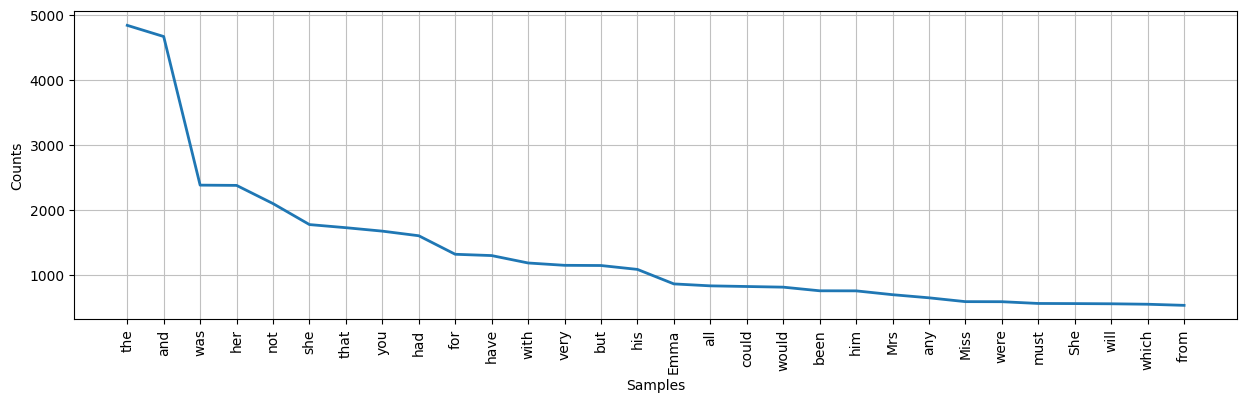

In [21]:
import matplotlib.pyplot as plt
# Text : 단어 리스트와 관련된 빈도 분석이나 단어검색을 쉽게 할수 있는 도구
from nltk import Text
plt.figure(figsize=(15,4))
emma_text = Text(word_list)
emma_text.plot(30)
plt.show()

In [22]:
emma_text.count('Emma')

865

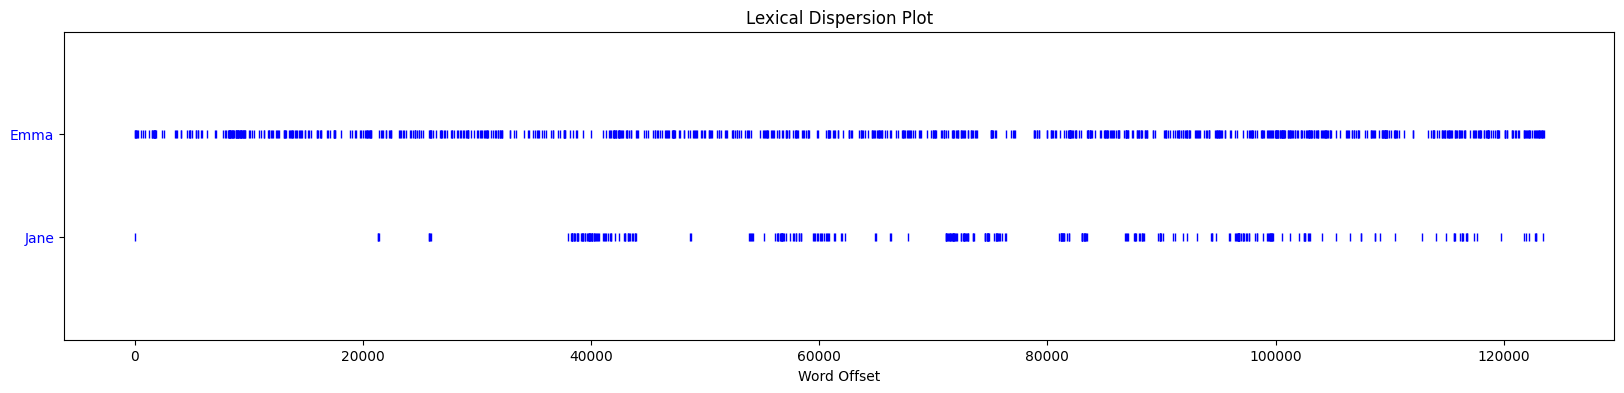

In [24]:
# 단어들이 텍스트 전체에서 어디에 나타나는지 시각적으로 보여주는 분산 그래프
plt.figure(figsize=(20,4))
emma_text.dispersion_plot(['Emma', 'Jane', 'thing'])

In [26]:
# 고유명사(이름) 출현 빈도
name_list = [word for word,tag in tagged_list if tag in ['NNP', 'NNPS']]
from nltk import FreqDist
name_wordcount = FreqDist(name_list)
name_wordcount

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [28]:
[word for word, count in name_wordcount.items() if count >= 150]

['Emma',
 'Jane',
 'Woodhouse',
 'Miss',
 'Weston',
 'Mrs',
 'Hartfield',
 'Knightley',
 'Elton',
 'Churchill',
 'Frank',
 'Harriet',
 'Fairfax']

In [30]:
import pandas as pd
wordcnt = pd.Series(name_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt[wordcnt>150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64